## 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

Spam Detection: Classify emails as "spam" or "not spam."
Medical Diagnosis: Predict if a patient has a disease (e.g., "yes" or "no") based on test results.
Loan Approval: Decide if a loan should be approved or not.

Start from the root: The tree starts with the question at the top (e.g., "Is age > 30?").
Split the data: Split the data into smaller groups based on the answer (yes/no).
Continue splitting: The tree continues to ask questions and split the data until:
Each group contains mostly one class (e.g., "spam" or "not spam").
Or the tree reaches a stopping point (such as maximum depth).
Make a prediction: Once the data reaches the end of a branch (called a "leaf"), the tree predicts the class of that branch.

Decision Trees: Predicts a category (e.g., yes/no, spam/not spam). It does this by asking a series of yes/no questions (splits) until a decision is made. This process is like stepping things into categories.
Linear Regression: Predicts a number (e.g., house price, test score). It uses a mathematical formula to calculate the prediction. The formula is based on the relationship between the features and the target

## 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

Definition: The proportion of correct predictions (true positives and true negatives) out of all predictions. 
Use case: Works best when the class distribution is balanced (that is, the dataset contains nearly equal numbers of positives and negatives). 
Example: diagnosing common flu in the broader population. 
Rationale: If the majority of people do not have the flu, accuracy is a good indicator of model performance.

Definition: The percentage of genuine positives that are correctly detected. 
Use Case: Critical in instances where missing positives is expensive or risky.
Example, a hospital cancer screening. 
Rationale: Missing a cancer diagnosis (false negative) could have serious consequences, so detecting as many real positives as possible is crucial, even if it means making a few false positives.

Definition: The percentage of actual negatives that are accurately identified.
Use Case: Important when preventing false positives is a concern.
Example: detecting fraud in banking transactions.
Rationale: Falsely identifying normal transactions as fraud (false positives) is disruptive to consumers, so it is essential to correctly identify real negatives.

Definition: The percentage of positive predictions that are really correct.
Use Case: When the cost of false positives is large and you require great confidence in positive forecasts.
As an example, consider spam email detection.
Rationale: It's better to flag fewer emails as spam with high precision.
https://chatgpt.com/share/673cfdb5-0748-8000-b7e4-f7460af6abbd

## 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

In [1]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')

# Drop rows with any NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Ensure proper data types for specified columns
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the summary of the cleaned dataset
print(ab_reduced_noNaN.info())

# Display the first few rows of the cleaned dataset
print(ab_reduced_noNaN.head())

# Save the cleaned dataset to a CSV file if needed
ab_reduced_noNaN.to_csv('cleaned_amazon_books.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)        

/tmp/ipykernel_118/1485794902.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_118/1485794902.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_118/1485794902.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

## 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model


/tmp/ipykernel_149/4152901137.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_149/4152901137.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_149/4152901137.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Number of observations in training set: 255
Number of observations in testing set: 64


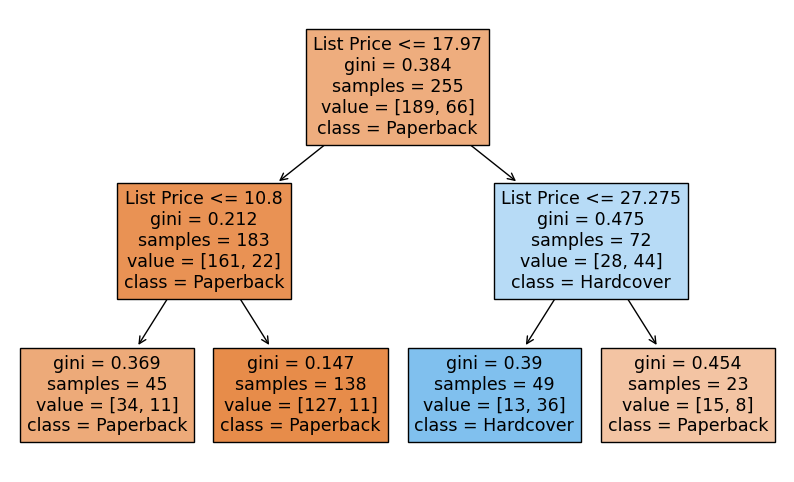

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')

# Drop rows with any NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Ensure proper data types for specified columns
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Create an 80/20 train-test split with a fixed random seed for reproducibility
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in each set
print(f"Number of observations in training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in testing set: {len(ab_reduced_noNaN_test)}")

# Define the target variable (y) and feature variable (X)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # 'H' represents hardcover
X = ab_reduced_noNaN_train[['List Price']]

# Initialize the DecisionTreeClassifier model with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model to the training data
clf.fit(X, y)

# Visualize the decision tree using plot_tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


The decision tree divides data into groups depending on the List Price feature. Each split generates a rule like "Is List Price ≤ X?". (Where X is a threshold chosen by the model during training).
At the bottom of the tree (leaf nodes), the model predicts either paperback (class 0) or hardcover (class 1).
These predictions are based on the most common class in the training data for each split.
Probabilities for Each Node:
Each node displays the class probabilities.
For example, a node with values [0.8, 0.2] indicates that 80% of the books in that node are paperback and 20% are hardcover.
Interpretation: The plot_tree visualization shows the path of splits.
If the List Price falls below a specific threshold, the book may be categorized as a Paperback.
If the list price surpasses a specific threshold, it may be categorized as a hardcover.
https://docs.google.com/document/d/1L1NZnliIhqJ4FzGRu8bgh1BxXGquwWBggmzskTG-r0s/edit?tab=t.0

## 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

/tmp/ipykernel_149/3698792281.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_149/3698792281.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_149/3698792281.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

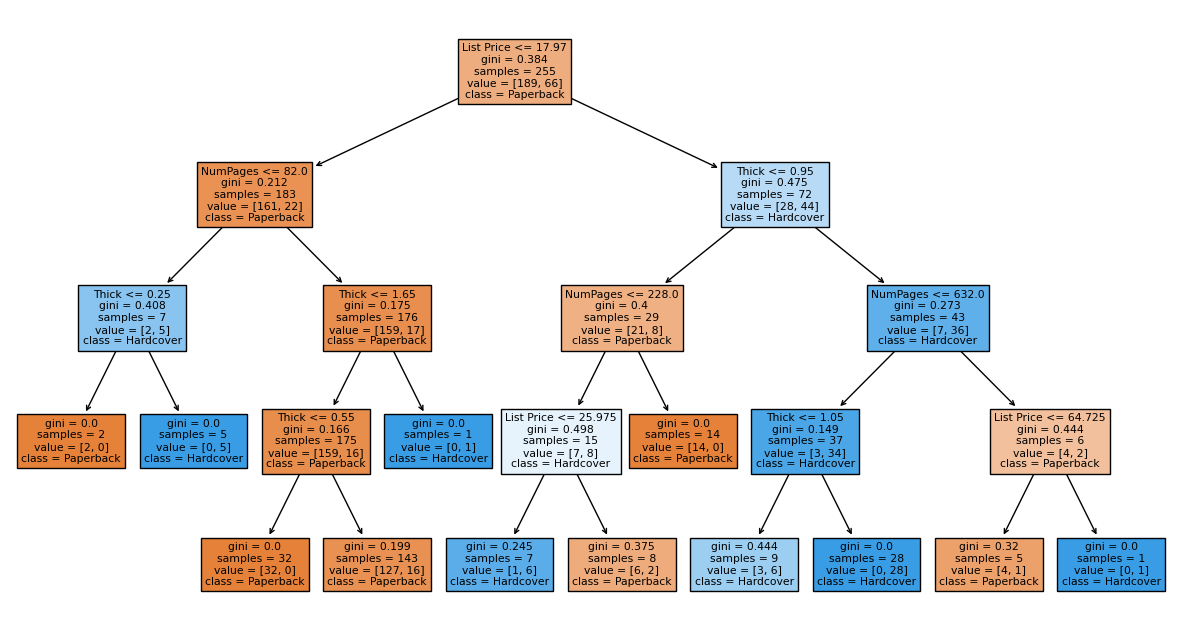

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')

# Drop rows with any NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Ensure proper data types for specified columns
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Create an 80/20 train-test split with a fixed random seed for reproducibility
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Define the target variable (y) and feature variables (X)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # 'H' represents hardcover
X_new = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Initialize a new DecisionTreeClassifier model with a max depth of 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the model to the training data
clf2.fit(X_new, y)

# Visualize the decision tree for clf2 using plot_tree
plt.figure(figsize=(15, 8))
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


## 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

/tmp/ipykernel_149/1873567130.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_149/1873567130.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_149/1873567130.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

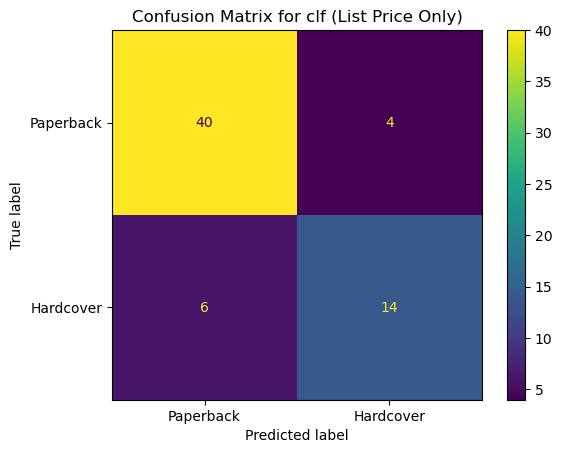

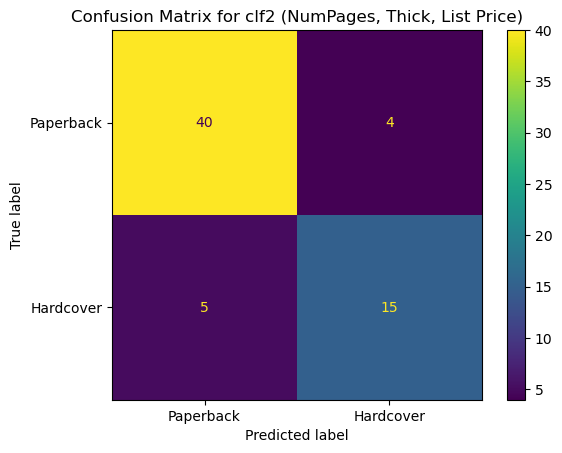

Metrics for clf (List Price Only):
Sensitivity: 0.7, Specificity: 0.909, Accuracy: 0.844

Metrics for clf2 (NumPages, Thick, List Price):
Sensitivity: 0.75, Specificity: 0.909, Accuracy: 0.859


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')

# Drop rows with any NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Ensure proper data types for specified columns
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Create an 80/20 train-test split with a fixed random seed for reproducibility
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Define the target variable (y) and feature variables (X) for both classifiers
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # 'H' represents hardcover
X_train_clf = ab_reduced_noNaN_train[['List Price']]
X_train_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Initialize and train the classifiers
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit both models
clf.fit(X_train_clf, y_train)
clf2.fit(X_train_clf2, y_train)

# Define the target variable (y_test) and feature variables (X_test) for the testing set
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # 'H' represents hardcover
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Predict using both models on the test set
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Calculate confusion matrices
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Display confusion matrices
ConfusionMatrixDisplay(conf_matrix_clf, display_labels=['Paperback', 'Hardcover']).plot()
plt.title("Confusion Matrix for clf (List Price Only)")
plt.show()

ConfusionMatrixDisplay(conf_matrix_clf2, display_labels=['Paperback', 'Hardcover']).plot()
plt.title("Confusion Matrix for clf2 (NumPages, Thick, List Price)")
plt.show()

# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(conf_matrix):
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    accuracy = (TP + TN) / np.sum(conf_matrix)
    
    return np.round(sensitivity, 3), np.round(specificity, 3), np.round(accuracy, 3)

# Calculate metrics for both models
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(conf_matrix_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(conf_matrix_clf2)

# Report the metrics
print(f"Metrics for clf (List Price Only):")
print(f"Sensitivity: {sensitivity_clf}, Specificity: {specificity_clf}, Accuracy: {accuracy_clf}\n")

print(f"Metrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}, Accuracy: {accuracy_clf2}")


A positive denotes the class of interest or the target class you wish to predict. In this scenario, Positive equals Hardcover (1 in the binary target variable).
Negative equals Paperback (0 in the binary target variable).

The confusion matrix structure in scikit-learn is as follows:

Actual \ Predicted	Negative (0)	Positive (1)
Negative (0)	True Negative (TN)	False Positive (FP)
Positive (1)	False Negative (FN)	True Positive (TP)

True Positive (TP): The model predicted Hardcover (1) and it was actually Hardcover.
True Negative (TN): The model predicted Paperback (0) and it was actually Paperback.
False Positive (FP): The model predicted Hardcover (1), but it was actually Paperback.
False Negative (FN): The model predicted Paperback (0), but it was actually Hardcover

TP (True Positive): This value is high when the model correctly identifies most of the hardcover books. This value is high when the model is good at identifying features related to hardcover. 
TN (True Negative): This value is high when the model correctly identifies most of the paperback books. This value is high when the model avoids over-predicting hardcover. 
FP (False Positive): This value is high when the model incorrectly predicts paperback books as hardcover. This value is high when the model over-predicts hardcover. 
FN (False Negative): This value is high when the model incorrectly predicts hardcover books as paperback. This value is high when the model fails to identify features related to hardcover.

In the confusion_matrix function, y_true (the actual label) appears first, and y_pred (the predicted label) appears second:
confusion_matrix(y_true, y_pred)

To use 3 significant figures (e.g. 0.123) instead of percentages:
Format numbers using np.round():
cm = chaos_matrix(y_true, y_pred)
cm_normalized = np.round(cm / cm.sum(), 3) # Normalize and round to 3 significant figures
Adjust the confusion matrix visualization:
disp = ConfusionMatrixDisplay(cm_normalized, display_labels=['Paperback', 'Hardcover'])
disp.plot(cmap='Blues', values_format='.3f') # Display values ​​in decimal form
https://docs.google.com/document/d/1L1NZnliIhqJ4FzGRu8bgh1BxXGquwWBggmzskTG-r0s/edit?tab=t.0

## 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

The two confusion matrices differ because the first model (clf) makes predictions based solely on the List Price feature, whereas the second model (clf2) does so using numerous characteristics. By integrating more features, clf2 can detect additional patterns in the data, potentially improving classification accuracy.

The confusion matrices for the test set (above for clf and clf2) are superior because they assess the models on previously unseen data, offering a more accurate indication of how well the models generalize. Training set confusion matrices frequently produce too optimistic results because the models are evaluated using the same data that they were trained on.


## 8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

When building a decision tree, the algorithm considers all possible splitting rules for all predictors.
At each step, it chooses the split that improves predictions the most based on criteria such as Gini impurity or Shannon entropy.
The contribution of each feature to these improvements is tracked, which is how feature importance is calculated.
Feature importance tells us how much each predictor contributes to the overall predictive power of the tree.

Unlike multiple linear regression, where you can directly see how each feature affects the prediction, decision trees involve complex interactions between features.
Feature importance simplifies this by summarizing how important each feature is for making a prediction.
It’s a convenient way to see which variables the model considers to be most important.

Decision trees can become very complex, leading to overfitting, where the model performs well on the training data but poorly on new data.
GridSearchCV can help us find the best settings (such as max_depth) to balance complexity and accuracy, ensuring that the model has good generalization capabilities.

## 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In linear regression, coefficients show how much the target changes when a predictor changes by one unit, making them easy to interpret directly. In decision trees, feature importance shows how much each variable helps the model make better predictions, but it’s less direct because it’s based on all the splits and interactions in the tree. Linear models are straightforward, while decision trees are more complex to interpret.
https://docs.google.com/document/d/1L1NZnliIhqJ4FzGRu8bgh1BxXGquwWBggmzskTG-r0s/edit?tab=t.0

## 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

yes